In [1]:
!unzip Airplanes_Annotations.zip

Archive:  Airplanes_Annotations.zip
replace Airplanes_Annotations/airplane_095.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: Airplanes_Annotations/airplane_095.csv  
  inflating: Airplanes_Annotations/airplane_094.csv  
  inflating: Airplanes_Annotations/airplane_093.csv  
  inflating: Airplanes_Annotations/airplane_092.csv  
  inflating: Airplanes_Annotations/airplane_091.csv  
  inflating: Airplanes_Annotations/airplane_090.csv  
 extracting: Airplanes_Annotations/airplane_089.csv  
 extracting: Airplanes_Annotations/airplane_088.csv  
 extracting: Airplanes_Annotations/airplane_087.csv  
 extracting: Airplanes_Annotations/airplane_086.csv  
  inflating: Airplanes_Annotations/airplane_085.csv  
 extracting: Airplanes_Annotations/airplane_084.csv  
  inflating: Airplanes_Annotations/airplane_083.csv  
  inflating: Airplanes_Annotations/airplane_082.csv  
 extracting: Airplanes_Annotations/airplane_081.csv  
 extracting: Airplanes_Annotations/airplane_080.csv  
 extracting:

In [2]:
!unzip Images.zip

Archive:  Images.zip
replace Images/airplane_007.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Images/airplane_007.jpg  
  inflating: Images/airplane_006.jpg  
  inflating: Images/airplane_005.jpg  
  inflating: Images/airplane_004.jpg  
  inflating: Images/airplane_003.jpg  
  inflating: Images/airplane_002.jpg  
  inflating: Images/airplane_001.jpg  
  inflating: Images/428503.jpg       
  inflating: Images/428501.jpg       
  inflating: Images/428492.jpg       
  inflating: Images/428491.jpg       
  inflating: Images/428483.jpg       
  inflating: Images/428482.jpg       
  inflating: Images/428481.jpg       
  inflating: Images/428472.jpg       
  inflating: Images/428462.jpg       
  inflating: Images/428461.jpg       
  inflating: Images/428452.jpg       
  inflating: Images/428451.jpg       
  inflating: Images/42850.jpg        
  inflating: Images/42849.jpg        
  inflating: Images/42848.jpg        
  inflating: Images/42847.jpg        
  inflating: Images/airpl

In [0]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras

In [0]:
path = "Images"
annot = "Airplanes_Annotations"

airplane_473.jpg


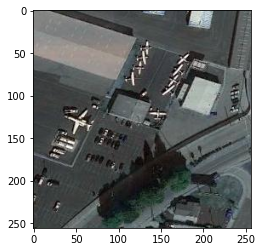

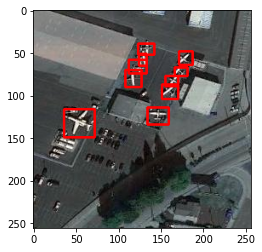

In [5]:
for e, i in enumerate(os.listdir(annot)):
  if e < 10:
    filename = i.split(".")[0]+".jpg"
    print(filename)
    img = cv2.imread(os.path.join(path,filename))
    df = pd.read_csv(os.path.join(annot, i))
    plt.imshow(img)
    for row in df.iterrows():
      x1 = int(row[1][0].split(" ")[0])
      y1 = int(row[1][0].split(" ")[1])
      x2 = int(row[1][0].split(" ")[2])
      y2 = int(row[1][0].split(" ")[3])
      cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    plt.figure()
    plt.imshow(img)
    break

In [0]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

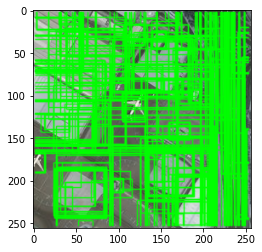

In [7]:
im = cv2.imread(os.path.join(path, "42850.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(imOut)

In [0]:
train_images = []
train_labels = []

In [0]:
def get_iou(bb1, bb2):
  assert bb1['x1'] < bb1['x2']
  assert bb1['y1'] < bb1['y2']
  assert bb2['x1'] < bb2['x2']
  assert bb2['y1'] < bb2['y2']

  x_left = max(bb1['x1'], bb2['x1'])
  y_top = max(bb1['y1'], bb2['y1'])
  x_right = min(bb1['x2'], bb2['x2'])
  y_bottom = min(bb1['y2'], bb2['y2'])

  if x_right < x_left or y_bottom < y_top:
    return 0.0

  intersection_area = (x_right - x_left)*(y_bottom - y_top)

  bb1_area = (bb1['x2'] - bb1['x1'])*(bb1['y2'] - bb1['y1'])
  bb2_area = (bb2['x2'] - bb2['x1'])*(bb2['y2'] - bb2['y1'])

  iou = intersection_area/float(bb1_area + bb2_area - intersection_area)
  assert iou >= 0.0
  assert iou <= 1.0
  return iou

In [0]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [11]:
for e, i in enumerate(os.listdir(annot)):
  try:
    if i.startswith("airplane"):
      filename = i.split(".")[0]+".jpg"
      print(e, filename)
      image = cv2.imread(os.path.join(path, filename))
      df = pd.read_csv(os.path.join(annot, i))
      gtvalues = []
      for row in df.iterrows():
        x1 = int(row[1][0].split(" ")[0])
        y1 = int(row[1][0].split(" ")[1])
        x2 = int(row[1][0].split(" ")[2])
        y2 = int(row[1][0].split(" ")[3])
        gtvalues.append({"x1":x1, "x2":x2, "y1":y1, "y2":y2})
      ss.setBaseImage(image)
      ss.switchToSelectiveSearchFast()
      ssresults = ss.process()
      imout = image.copy()
      counter = 0
      falsecounter = 0
      flag = 0
      fflag = 0
      bflag = 0
      for e,result in enumerate(ssresults):
        if e < 2000 and flag == 0:
          for gtval in gtvalues:
            x,y,w,h = result
            iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
            if counter < 30:
              if iou > 0.70:
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                train_images.append(resized)
                train_labels.append(1)
                counter += 1
              else :
                fflag =1
                if falsecounter <30:
                  if iou < 0.3:
                    timage = imout[y:y+h,x:x+w]
                    resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                    train_images.append(resized)
                    train_labels.append(0)
                    falsecounter += 1
                  else :
                    bflag = 1
              if fflag == 1 and bflag == 1:
                print("inside")
                flag = 1

  except Exception as e:
    print(e)
    print("error in " + filename)
    continue

0 airplane_473.jpg
1 airplane_441.jpg
2 airplane_676.jpg
inside
3 airplane_626.jpg
inside
inside
4 airplane_505.jpg
inside
inside
inside
5 airplane_006.jpg
6 airplane_195.jpg
inside
inside
7 airplane_460.jpg
inside
8 airplane_146.jpg
inside
9 airplane_113.jpg
inside
10 airplane_660.jpg
11 airplane_105.jpg
inside
12 airplane_628.jpg
13 airplane_192.jpg
inside
inside
14 airplane_681.jpg
15 airplane_089.jpg
16 airplane_408.jpg
17 airplane_484.jpg
inside
inside
inside
inside
inside
18 airplane_533.jpg
inside
inside
19 airplane_404.jpg
inside
inside
inside
inside
20 airplane_672.jpg
21 airplane_321.jpg
22 airplane_673.jpg
inside
23 airplane_291.jpg
inside
25 airplane_393.jpg
inside
inside
26 airplane_317.jpg
inside
inside
27 airplane_431.jpg
inside
28 airplane_099.jpg
inside
29 airplane_580.jpg
30 airplane_165.jpg
31 airplane_400.jpg
inside
inside
32 airplane_282.jpg
33 airplane_254.jpg
34 airplane_091.jpg
inside
35 airplane_461.jpg
36 airplane_486.jpg
inside
inside
inside
inside
inside
37 

In [0]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [13]:
X_new.shape

(16748, 224, 224, 3)

In [0]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import Model
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.vgg16 import VGG16

In [15]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [0]:
X= vggmodel.layers[-2].output

In [0]:
predictions = Dense(2, activation="softmax")(X)

In [0]:
model_final = Model(inputs = vggmodel.inputs, outputs = predictions)

In [0]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)

In [0]:
model_final.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [23]:
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [0]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [0]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [0]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [28]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(15073, 224, 224, 3) (1675, 224, 224, 3) (15073, 2) (1675, 2)


In [0]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [31]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [32]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/1000
10/10 [==============================] - ETA: 0s - loss: 1.2721 - accuracy: 0.7750
Epoch 00001: val_loss improved from inf to 0.31101, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 10s 1s/step - loss: 1.2721 - accuracy: 0.7750 - val_loss: 0.3110 - val_accuracy: 0.8750
Epoch 2/1000
10/10 [==============================] - ETA: 0s - loss: 0.3323 - accuracy: 0.8781
Epoch 00002: val_loss improved from 0.31101 to 0.29207, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 42s 4s/step - loss: 0.3323 - accuracy: 0.8781 - val_loss: 0.2921 - val_accuracy: 0.8750
Epoch 3/1000
10/10 [==============================] - ETA: 0s - loss: 0.3174 - accuracy: 0.8469
Epoch 00003: val_loss improved from 0.29207 to 0.21437, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 41s 4s/step - loss: 0.3174 - accuracy: 0.8469 - val_loss: 0.2144 

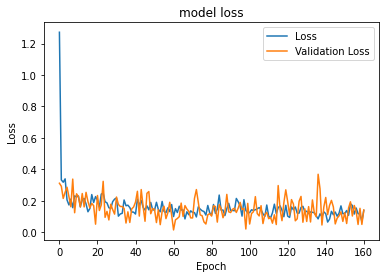

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

not plane


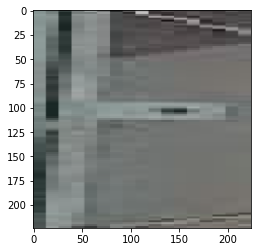

In [52]:
im = X_test[1600]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("plane")
else:
    print("not plane")

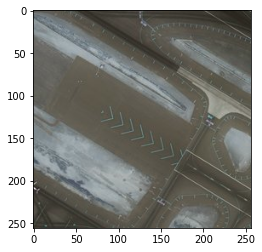

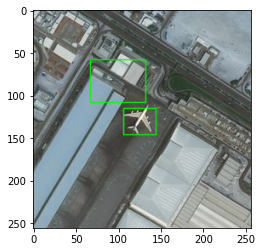

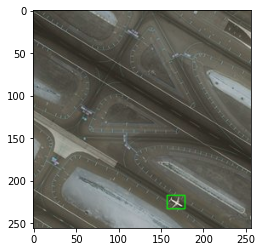

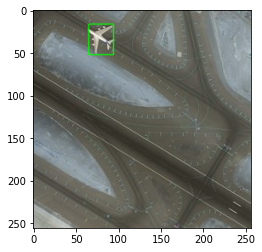

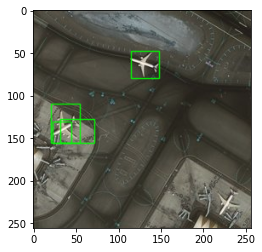

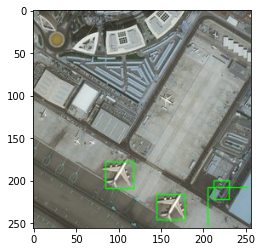

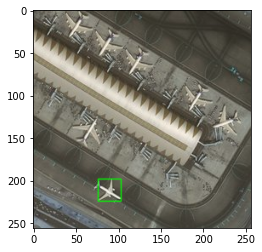

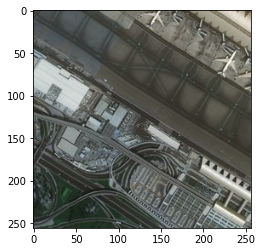

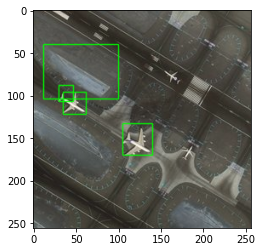

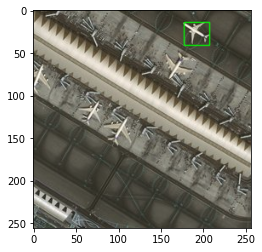

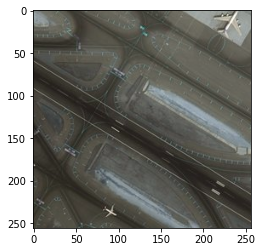

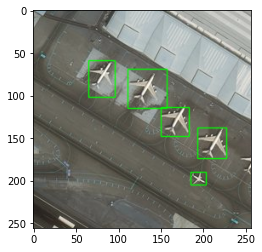

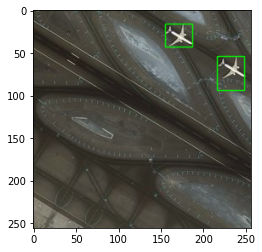

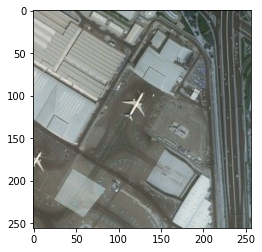

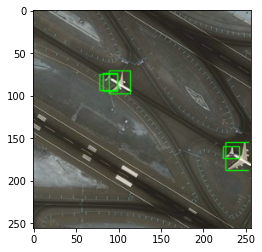

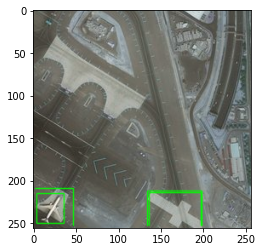

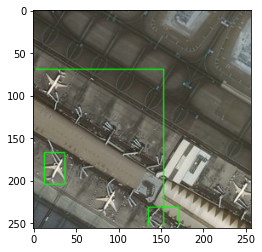

In [54]:
z=0
for e,i in enumerate(os.listdir(path)):
    if i.startswith("4"):
        z += 1
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)